<a href="https://colab.research.google.com/github/SanyaKapoor/Commodity-Derivatives-Indexation/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install investpy

     |████████████████████████████████| 4.4MB 2.7MB/s 
     |████████████████████████████████| 245kB 37.9MB/s 
     |████████████████████████████████| 5.5MB 36.9MB/s 
  Created wheel for investpy: filename=investpy-0.9.14-cp36-none-any.whl size=4469457 sha256=efebaad76c25cad290b8dce3342d63bffea3c682c4b47eb46d473f64befa480f
  Stored in directory: /root/.cache/pip/wheels/86/35/ee/fc38f22f1353037b5118cff64b62aeed42f63f2c84135eaaaa
Successfully built investpy
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import statsmodels.tsa as ts
from numpy import array
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import investpy
import numpy as np
import pandas as pd
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
 df = investpy.commodities.get_commodity_historical_data(commodity="MCX Mentha Oil",
                                                   from_date='19/12/2011',
                                                   to_date='26/4/2020',
                                                   country='india',
                                                   order='ascending', interval='Daily')
 df = df.drop(columns=['Currency'])
 df['span'] = df['High'] - df['Low']
 df = df[df['Volume'] > 0]
 df = df.reset_index()
 df = df.drop(columns=['High' , 'Low'])
 df

,Date,Open,Close,Volume,span
0,2011-12-19,1308.5,1315.0,2099,18.8
1,2011-12-20,1315.0,1295.3,2809,27.4
2,2011-12-21,1294.8,1297.6,2159,11.1
3,2011-12-22,1296.5,1291.8,3067,19.4
4,2011-12-23,1292.2,1307.8,2535,20.5
...,...,...,...,...,...
2150,2020-04-20,1268.9,1251.2,21,26.9
2151,2020-04-21,1279.9,1253.7,25,32.7
2152,2020-04-22,1231.2,1231.5,22,19.0
2153,2020-04-23,1245.0,1239.9,58,20.9


In [ ]:
dfs = investpy.commodities.get_commodity_historical_data(commodity="MCX Cardamom",
                                                   from_date='19/12/2011',
                                                   to_date='26/4/2020',
                                                   country='india',
                                                   order='ascending', interval='Daily')
dfs = dfs.reset_index()
dfs = dfs.drop(columns=['Currency'])
dfs['span'] = dfs['High'] - dfs['Low']
dfs = dfs.drop(columns=['High' , 'Low'])
dfs = dfs[dfs['Volume'] > 0]
dfs = dfs[dfs.Date.isin(df.Date)]
dfs

,Date,Open,Close,Volume,span
0,2011-12-19,611.0,588.4,4227,24.9
1,2011-12-20,587.0,580.7,3147,19.0
2,2011-12-21,581.3,591.0,3372,18.9
3,2011-12-22,591.4,588.3,2165,10.8
4,2011-12-23,588.3,590.5,1404,6.4
...,...,...,...,...,...
2184,2020-04-07,2020.0,2031.2,24,58.0
2185,2020-04-08,2031.0,2048.4,5,29.0
2191,2020-04-20,1740.0,1735.5,2,9.0
2192,2020-04-21,1785.0,1785.0,1,0.0


In [ ]:
n = dfs.values
n = n.reshape((n.shape[0], n.shape[1], 1))
n.shape

(2125, 5, 1)

(2125, 5, 1)
(2125, 5, 1)
(2125, 5, 1)
(2125, 5, 1)
(2125, 5, 1)
(2125, 5, 1)
(2125, 5, 1)
(2125, 5, 1)
(2125, 5, 1)
(2125, 5, 1)
(2125, 5, 1)


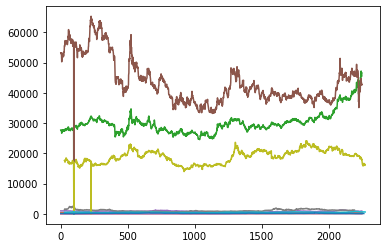

(2125, 5, 12)


In [ ]:
mcx = ['MCX Aluminum Mini','MCX Copper','MCX Gold Mini','MCX Lead Mini','MCX Nickel','MCX Silver Micro','MCX Zinc Mini',"MCX Mentha Oil",'MCX Cotton',
       'MCX Crude Palm Oil','MCX Natural Gas']
for i in mcx:
  df2 = investpy.commodities.get_commodity_historical_data(commodity=i,
                                                   from_date='19/12/2011',
                                                   to_date='26/4/2020',
                                                   country='india',
                                                   order='ascending', interval='Daily')
  df2 = df2.reset_index()
  df2 = df2.drop(columns=['Currency'])
  df2['span'] = df2['High'] - df2['Low']
  df2 = df2[df2['Volume'] > 0]
  df2 = df2.drop(columns=['High' , 'Low'])
  df2 = df2[df2.Date.isin(df.Date)]
  if(df2.shape[0] > 2125):
    s =  df2.shape[0] - 2125
    df2 = df2[s:]
  card = df2.values
  card = card.reshape((card.shape[0], card.shape[1], 1))
  print(card.shape)
  n = np.concatenate((n,card), axis = 2)
  plt.plot(df2['Close'])
plt.show()
print(n.shape)

In [ ]:
n[2000][2][1]

129.15

1423 702
Epoch 1/10
1402/1402 - 1s - loss: 0.0023 - accuracy: 7.1327e-04
Epoch 2/10
1402/1402 - 1s - loss: 3.1949e-04 - accuracy: 7.1327e-04
Epoch 3/10
1402/1402 - 1s - loss: 2.5103e-04 - accuracy: 7.1327e-04
Epoch 4/10
1402/1402 - 2s - loss: 2.2042e-04 - accuracy: 7.1327e-04
Epoch 5/10
1402/1402 - 1s - loss: 1.8977e-04 - accuracy: 7.1327e-04
Epoch 6/10
1402/1402 - 1s - loss: 1.8240e-04 - accuracy: 7.1327e-04
Epoch 7/10
1402/1402 - 1s - loss: 1.8346e-04 - accuracy: 7.1327e-04
Epoch 8/10
1402/1402 - 1s - loss: 1.7496e-04 - accuracy: 7.1327e-04
Epoch 9/10
1402/1402 - 1s - loss: 1.7460e-04 - accuracy: 7.1327e-04
Epoch 10/10
1402/1402 - 1s - loss: 1.6755e-04 - accuracy: 7.1327e-04


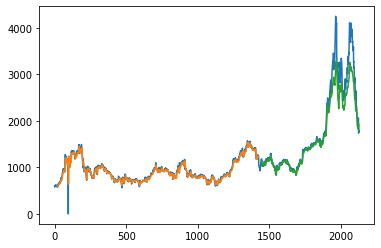

1423 702
Epoch 1/10
1402/1402 - 1s - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 2/10
1402/1402 - 1s - loss: 7.8036e-04 - accuracy: 0.0000e+00
Epoch 3/10
1402/1402 - 1s - loss: 7.2126e-04 - accuracy: 0.0000e+00
Epoch 4/10
1402/1402 - 1s - loss: 7.1794e-04 - accuracy: 0.0000e+00
Epoch 5/10
1402/1402 - 1s - loss: 6.4868e-04 - accuracy: 0.0000e+00
Epoch 6/10
1402/1402 - 1s - loss: 6.5645e-04 - accuracy: 0.0000e+00
Epoch 7/10
1402/1402 - 2s - loss: 6.0458e-04 - accuracy: 0.0000e+00
Epoch 8/10
1402/1402 - 1s - loss: 5.9585e-04 - accuracy: 0.0000e+00
Epoch 9/10
1402/1402 - 1s - loss: 5.8355e-04 - accuracy: 0.0000e+00
Epoch 10/10
1402/1402 - 1s - loss: 5.8594e-04 - accuracy: 0.0000e+00


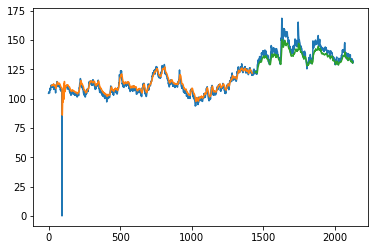

1423 702
Epoch 1/10
1402/1402 - 1s - loss: 0.0156 - accuracy: 7.1327e-04
Epoch 2/10
1402/1402 - 1s - loss: 0.0017 - accuracy: 7.1327e-04
Epoch 3/10
1402/1402 - 2s - loss: 0.0015 - accuracy: 7.1327e-04
Epoch 4/10
1402/1402 - 1s - loss: 0.0013 - accuracy: 7.1327e-04
Epoch 5/10
1402/1402 - 1s - loss: 0.0012 - accuracy: 7.1327e-04
Epoch 6/10
1402/1402 - 1s - loss: 0.0012 - accuracy: 7.1327e-04
Epoch 7/10
1402/1402 - 1s - loss: 0.0011 - accuracy: 7.1327e-04
Epoch 8/10
1402/1402 - 1s - loss: 0.0011 - accuracy: 7.1327e-04
Epoch 9/10
1402/1402 - 1s - loss: 0.0011 - accuracy: 7.1327e-04
Epoch 10/10
1402/1402 - 1s - loss: 9.9525e-04 - accuracy: 7.1327e-04


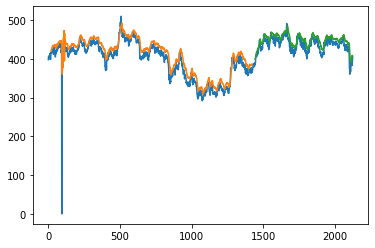

1423 702
Epoch 1/10
1402/1402 - 1s - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 2/10
1402/1402 - 2s - loss: 6.0776e-04 - accuracy: 0.0000e+00
Epoch 3/10
1402/1402 - 1s - loss: 5.8650e-04 - accuracy: 0.0000e+00
Epoch 4/10
1402/1402 - 1s - loss: 5.8746e-04 - accuracy: 0.0000e+00
Epoch 5/10
1402/1402 - 1s - loss: 5.6379e-04 - accuracy: 0.0000e+00
Epoch 6/10
1402/1402 - 1s - loss: 5.6185e-04 - accuracy: 0.0000e+00
Epoch 7/10
1402/1402 - 2s - loss: 5.0625e-04 - accuracy: 0.0000e+00
Epoch 8/10
1402/1402 - 1s - loss: 5.1347e-04 - accuracy: 0.0000e+00
Epoch 9/10
1402/1402 - 2s - loss: 5.0171e-04 - accuracy: 0.0000e+00
Epoch 10/10
1402/1402 - 1s - loss: 5.0631e-04 - accuracy: 0.0000e+00


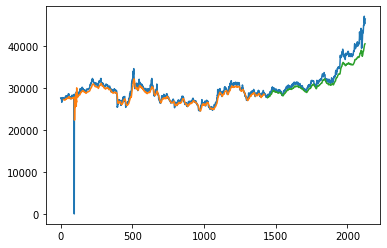

1423 702
Epoch 1/10
1402/1402 - 1s - loss: 0.0125 - accuracy: 0.0000e+00
Epoch 2/10
1402/1402 - 1s - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 3/10
1402/1402 - 2s - loss: 8.4976e-04 - accuracy: 0.0000e+00
Epoch 4/10
1402/1402 - 2s - loss: 8.4732e-04 - accuracy: 0.0000e+00
Epoch 5/10
1402/1402 - 2s - loss: 8.1000e-04 - accuracy: 0.0000e+00
Epoch 6/10
1402/1402 - 2s - loss: 7.7067e-04 - accuracy: 0.0000e+00
Epoch 7/10
1402/1402 - 2s - loss: 7.6815e-04 - accuracy: 0.0000e+00
Epoch 8/10
1402/1402 - 2s - loss: 7.4216e-04 - accuracy: 0.0000e+00
Epoch 9/10
1402/1402 - 2s - loss: 7.5123e-04 - accuracy: 0.0000e+00
Epoch 10/10
1402/1402 - 2s - loss: 7.0468e-04 - accuracy: 0.0000e+00


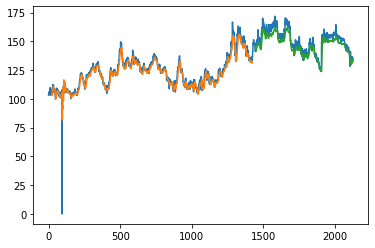

1423 702
Epoch 1/10
1402/1402 - 1s - loss: 0.0140 - accuracy: 0.0000e+00
Epoch 2/10
1402/1402 - 1s - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 3/10
1402/1402 - 1s - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 4/10
1402/1402 - 1s - loss: 9.9929e-04 - accuracy: 0.0000e+00
Epoch 5/10
1402/1402 - 2s - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 6/10
1402/1402 - 2s - loss: 9.6365e-04 - accuracy: 0.0000e+00
Epoch 7/10
1402/1402 - 1s - loss: 9.6564e-04 - accuracy: 0.0000e+00
Epoch 8/10
1402/1402 - 2s - loss: 9.2022e-04 - accuracy: 0.0000e+00
Epoch 9/10
1402/1402 - 1s - loss: 9.3117e-04 - accuracy: 0.0000e+00
Epoch 10/10
1402/1402 - 1s - loss: 9.2421e-04 - accuracy: 0.0000e+00


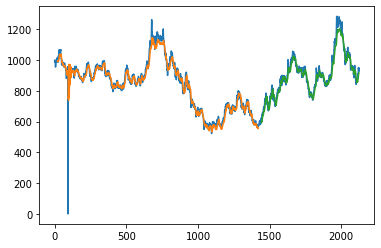

1423 702
Epoch 1/10
1402/1402 - 1s - loss: 0.0211 - accuracy: 7.1327e-04
Epoch 2/10
1402/1402 - 1s - loss: 0.0019 - accuracy: 7.1327e-04
Epoch 3/10
1402/1402 - 1s - loss: 0.0017 - accuracy: 7.1327e-04
Epoch 4/10
1402/1402 - 1s - loss: 0.0014 - accuracy: 7.1327e-04
Epoch 5/10
1402/1402 - 1s - loss: 0.0013 - accuracy: 7.1327e-04
Epoch 6/10
1402/1402 - 1s - loss: 0.0013 - accuracy: 7.1327e-04
Epoch 7/10
1402/1402 - 1s - loss: 0.0012 - accuracy: 7.1327e-04
Epoch 8/10
1402/1402 - 1s - loss: 0.0012 - accuracy: 7.1327e-04
Epoch 9/10
1402/1402 - 1s - loss: 0.0012 - accuracy: 7.1327e-04
Epoch 10/10
1402/1402 - 2s - loss: 0.0012 - accuracy: 7.1327e-04


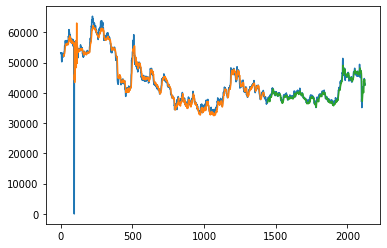

1423 702
Epoch 1/10
1402/1402 - 1s - loss: 0.0060 - accuracy: 7.1327e-04
Epoch 2/10
1402/1402 - 1s - loss: 6.2036e-04 - accuracy: 7.1327e-04
Epoch 3/10
1402/1402 - 2s - loss: 5.8156e-04 - accuracy: 7.1327e-04
Epoch 4/10
1402/1402 - 1s - loss: 4.8456e-04 - accuracy: 7.1327e-04
Epoch 5/10
1402/1402 - 1s - loss: 4.5328e-04 - accuracy: 7.1327e-04
Epoch 6/10
1402/1402 - 2s - loss: 4.5374e-04 - accuracy: 7.1327e-04
Epoch 7/10
1402/1402 - 1s - loss: 4.2899e-04 - accuracy: 7.1327e-04
Epoch 8/10
1402/1402 - 2s - loss: 4.1660e-04 - accuracy: 7.1327e-04
Epoch 9/10
1402/1402 - 2s - loss: 4.1130e-04 - accuracy: 7.1327e-04
Epoch 10/10
1402/1402 - 2s - loss: 3.8119e-04 - accuracy: 7.1327e-04


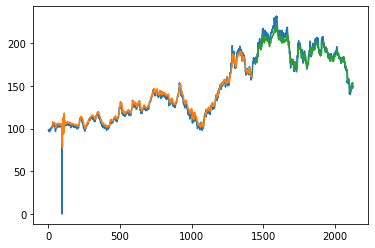

1423 702
Epoch 1/10
1402/1402 - 1s - loss: 0.0065 - accuracy: 7.1327e-04
Epoch 2/10
1402/1402 - 1s - loss: 0.0017 - accuracy: 7.1327e-04
Epoch 3/10
1402/1402 - 2s - loss: 0.0015 - accuracy: 7.1327e-04
Epoch 4/10
1402/1402 - 1s - loss: 0.0015 - accuracy: 7.1327e-04
Epoch 5/10
1402/1402 - 1s - loss: 0.0014 - accuracy: 7.1327e-04
Epoch 6/10
1402/1402 - 1s - loss: 0.0014 - accuracy: 7.1327e-04
Epoch 7/10
1402/1402 - 1s - loss: 0.0013 - accuracy: 7.1327e-04
Epoch 8/10
1402/1402 - 1s - loss: 0.0013 - accuracy: 7.1327e-04
Epoch 9/10
1402/1402 - 1s - loss: 0.0013 - accuracy: 7.1327e-04
Epoch 10/10
1402/1402 - 2s - loss: 0.0013 - accuracy: 7.1327e-04


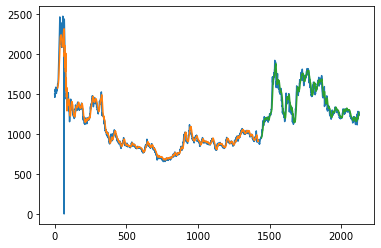

1423 702
Epoch 1/10
1402/1402 - 1s - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 2/10
1402/1402 - 1s - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 3/10
1402/1402 - 1s - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 4/10
1402/1402 - 1s - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 5/10
1402/1402 - 1s - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 6/10
1402/1402 - 1s - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 7/10
1402/1402 - 1s - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 8/10
1402/1402 - 2s - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 9/10
1402/1402 - 1s - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 10/10
1402/1402 - 2s - loss: 0.0013 - accuracy: 0.0000e+00


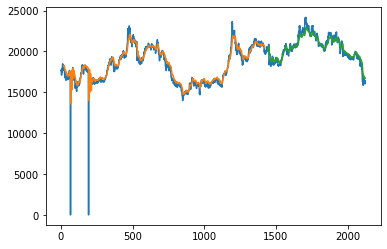

1423 702
Epoch 1/10
1402/1402 - 1s - loss: 0.0149 - accuracy: 0.0000e+00
Epoch 2/10
1402/1402 - 1s - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 3/10
1402/1402 - 2s - loss: 9.7131e-04 - accuracy: 0.0000e+00
Epoch 4/10
1402/1402 - 1s - loss: 9.3026e-04 - accuracy: 0.0000e+00
Epoch 5/10
1402/1402 - 1s - loss: 8.2612e-04 - accuracy: 0.0000e+00
Epoch 6/10
1402/1402 - 1s - loss: 7.7777e-04 - accuracy: 0.0000e+00
Epoch 7/10
1402/1402 - 1s - loss: 7.9035e-04 - accuracy: 0.0000e+00
Epoch 8/10
1402/1402 - 2s - loss: 7.1686e-04 - accuracy: 0.0000e+00
Epoch 9/10
1402/1402 - 2s - loss: 7.2699e-04 - accuracy: 0.0000e+00
Epoch 10/10
1402/1402 - 2s - loss: 7.3047e-04 - accuracy: 0.0000e+00


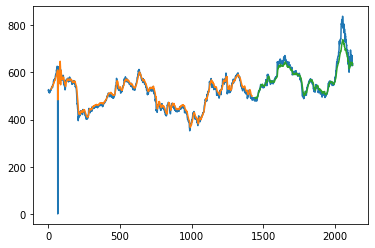

1423 702
Epoch 1/10
1402/1402 - 2s - loss: 0.0049 - accuracy: 0.0014
Epoch 2/10
1402/1402 - 2s - loss: 0.0013 - accuracy: 0.0014
Epoch 3/10
1402/1402 - 2s - loss: 0.0011 - accuracy: 0.0014
Epoch 4/10
1402/1402 - 2s - loss: 8.8817e-04 - accuracy: 0.0014
Epoch 5/10
1402/1402 - 2s - loss: 7.8111e-04 - accuracy: 0.0014
Epoch 6/10
1402/1402 - 2s - loss: 7.1802e-04 - accuracy: 0.0014
Epoch 7/10
1402/1402 - 2s - loss: 6.6344e-04 - accuracy: 0.0014
Epoch 8/10
1402/1402 - 2s - loss: 6.0037e-04 - accuracy: 0.0014
Epoch 9/10
1402/1402 - 2s - loss: 5.9550e-04 - accuracy: 0.0014
Epoch 10/10
1402/1402 - 2s - loss: 5.4348e-04 - accuracy: 0.0014


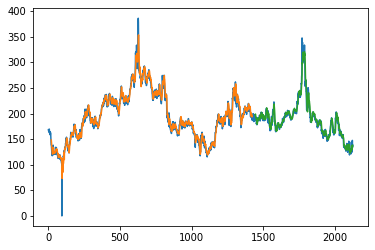

In [ ]:
Final_testPredicts = np.array([])
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Activation, Dense
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.reshape((np.array(dataY)),(-1,1))

for i in range (0,12):
  dataset = np.array([])
  for j in range(0,2125):
    dataset = np.append (dataset,n[j][2][i])
  dataset = dataset.astype('float32')
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(np.reshape(dataset,(-1, 1)))
  train_size = int(len(dataset) * 0.67)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
  print(len(train), len(test))
  look_back = 20
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)
  trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
  testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
  model = Sequential()
  model.add(LSTM(4, input_shape=(1,20)))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam',metrics=["accuracy"])
  model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
  trainPredict = model.predict(trainX)
  testPredict = model.predict(testX)
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform(trainY)
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform(testY)
  trainPredictPlot = np.empty_like(dataset)
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
  testPredictPlot = np.empty_like(dataset)
  testPredictPlot[:, :] = np.nan
  testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
  Final_testPredicts = np.append(Final_testPredicts, testPredict)
  plt.plot(scaler.inverse_transform(dataset))
  plt.plot(trainPredictPlot)
  plt.plot(testPredictPlot)
  testPredictPlot
  plt.show()

In [ ]:
Final_testPredicts.shape

(8172,)

In [ ]:
Final_testPredicts = np.reshape(Final_testPredicts, [12,681])
Final_testPredicts[0]

In [ ]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
final_matrix = np.empty((12,12))
for i in range(12):
  matrix = np.array([])
  for j in range(12):
    distance, path = fastdtw(Final_testPredicts[i], Final_testPredicts[j] , dist=euclidean)
    matrix = np.append(matrix,distance)
    final_matrix[i][j] = distance
final_matrix

array([[0.00000000e+00, 1.03827648e+06, 8.40458425e+05, 2.02854970e+07,
        1.03079846e+06, 4.48552709e+05, 2.63188320e+07, 9.98629418e+05,
        3.80387624e+05, 1.25068084e+07, 7.45593091e+05, 1.00655894e+06],
       [1.03827648e+06, 0.00000000e+00, 1.97818054e+05, 2.13237735e+07,
        4.33042378e+03, 5.07023963e+05, 2.73571084e+07, 3.96344156e+04,
        8.22593624e+05, 1.35450849e+07, 2.92683388e+05, 3.00381835e+04],
       [8.40458425e+05, 1.97818054e+05, 0.00000000e+00, 2.11259554e+07,
        1.90340032e+05, 3.09205909e+05, 2.71592904e+07, 1.58170994e+05,
        6.24775569e+05, 1.33472669e+07, 9.48653336e+04, 1.66100519e+05],
       [2.02854970e+07, 2.13237735e+07, 2.11259554e+07, 0.00000000e+00,
        2.13162954e+07, 2.08167495e+07, 5.34404021e+06, 2.12841264e+07,
        2.05011798e+07, 7.77868854e+06, 2.10310901e+07, 2.12920559e+07],
       [1.03079846e+06, 4.29180301e+03, 1.90340032e+05, 2.13162954e+07,
        0.00000000e+00, 4.99545940e+05, 2.73496304e+07, 3.10

In [ ]:
final_matrix.shape

(12, 12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


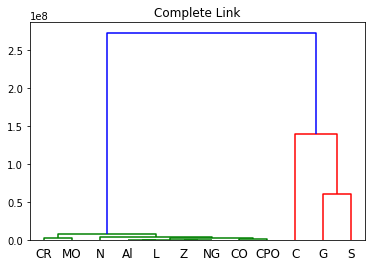

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
mat = final_matrix
dists = squareform(pdist(mat))
linkage_matrix = linkage(dists, "complete")
dendrogram(linkage_matrix, labels=["CR","Al","CO","G","L","N","S","Z","MO","C","CPO","NG"])
plt.title("Complete Link")
plt.show()

In [ ]:
Final_Volume_Predicts = np.array([])
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Activation, Dense
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.reshape((np.array(dataY)),(-1,1))

for i in range (0,12):
  dataset = np.array([])
  for j in range(0,2125):
    dataset = np.append (dataset,n[j][3][i])
  dataset = dataset.astype('float32')
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(np.reshape(dataset,(-1, 1)))
  train_size = int(len(dataset) * 0.67)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
  print(len(train), len(test))
  look_back = 20
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)
  trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
  testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
  model = Sequential()
  model.add(LSTM(4, input_shape=(1,20)))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam',metrics=["accuracy"])
  model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
  trainPredict = model.predict(trainX)
  testPredict = model.predict(testX)
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform(trainY)
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform(testY)
  trainPredictPlot = np.empty_like(dataset)
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
  testPredictPlot = np.empty_like(dataset)
  testPredictPlot[:, :] = np.nan
  testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
  Final_Volume_Predicts = np.append(Final_Volume_Predicts, testPredict)
  plt.plot(scaler.inverse_transform(dataset))
  plt.plot(trainPredictPlot)
  plt.plot(testPredictPlot)
  testPredictPlot
  plt.show()

In [ ]:
# Final_Volume_Predicts = np.reshape(Final_Volume_Predicts, [12,681])
# Final_Volume_Predicts.shape
Final_Volume = np.empty((12,681))
for i in range(12):
  for j in range(681):
    Final_Volume[i][j] = n[j+1443][3][i]

Final_Volume_Predicts = Final_Volume

In [ ]:
Final_Dates = dfs.Date[1444:]
Final_Dates.shape

(681,)

In [ ]:
Final_Price = np.empty((12,681))
for i in range(12):
  for j in range(681):
    Final_Price[i][j] = n[j+1443][2][i]

Final_Price_Predicts = Final_Price

In [ ]:
# ["CR","Al","CO","G","L","N","S","Z","MO","C","CPO","NG"]["CR , MO", "C , G , S" ,"N","L,AL,Z,NG ", "CO,CPO" ]
Cardamom = Final_testPredicts[0]
Al = Final_testPredicts[1]
Copper = Final_testPredicts[2]
Gold = Final_testPredicts[3]
Lead = Final_testPredicts[4]
Nickel = Final_testPredicts[5]
Silver = Final_testPredicts[6]
Zinc = Final_testPredicts[7]
MenthaOil = Final_testPredicts[8]
Cotton = Final_testPredicts[9]
Cpo = Final_testPredicts[10]
Ng = Final_testPredicts[11]
cluster1 = np.array([])
cluster2 = np.array([])
cluster3 = np.array([])
cluster4 = np.array([])
for i in range(681):
  cl1 = (Cardamom[i] + MenthaOil[i])/2
  cl2 = (Cotton[i] + Gold[i] + Silver[i])/3
  cl3 = (Lead[i] + Al[i] + Zinc[i] + Ng[i])/4
  cl4 = (Copper[i] + Cpo[i])/2
  cluster1 = np.append(cluster1,cl1)
  cluster2 = np.append(cluster2,cl2)
  cluster3 = np.append(cluster3,cl3)
  cluster4 = np.append(cluster4,cl4)


In [ ]:
cluster = np.array([])
final_file={"cluster1":cluster1,"cluster2":cluster2,"cluster3":cluster3,"cluster4":cluster4,"Nickel":Nickel}
f=pd.DataFrame(final_file)
f_np = f.to_numpy()
f_np.shape
f

,cluster1,cluster2,cluster3,cluster4,Nickel
0,996.368805,28100.260417,165.122314,433.868423,586.856262
1,1001.744080,28173.284505,164.834793,432.617905,588.127136
2,1017.660065,28237.637370,164.712460,433.406754,589.764587
3,1021.340271,28333.259766,164.274977,433.498642,590.589417
4,1036.144928,28404.764974,163.207197,434.094131,596.499023
...,...,...,...,...,...
676,1540.691223,33260.695638,140.722950,512.956467,876.108704
677,1561.975281,33151.137044,140.943356,513.788620,885.700928
678,1567.387878,33313.564128,141.718601,514.285172,891.680298
679,1572.183838,33179.058268,142.835762,510.431442,901.201233


In [ ]:
Cardamom_V = Final_Volume_Predicts[0]
Al_V = Final_Volume_Predicts[1]
Copper_V = Final_Volume_Predicts[2]
Gold_V = Final_Volume_Predicts[3]
Lead_V = Final_Volume_Predicts[4]
Nickel_V = Final_Volume_Predicts[5]
Silver_V = Final_Volume_Predicts[6]
Zinc_V = Final_Volume_Predicts[7]
MenthaOil_V = Final_Volume_Predicts[8]
Cotton_V = Final_Volume_Predicts[9]
Cpo_V = Final_Volume_Predicts[10]
Ng_V = Final_Volume_Predicts[11]
#Price Original
Cardamom_P = Final_Price_Predicts[0]
Al_P = Final_Price_Predicts[1]
Copper_P = Final_Price_Predicts[2]
Gold_P = Final_Price_Predicts[3]
Lead_P = Final_Price_Predicts[4]
Nickel_P = Final_Price_Predicts[5]
Silver_P = Final_Price_Predicts[6]
Zinc_P = Final_Price_Predicts[7]
MenthaOil_P = Final_Price_Predicts[8]
Cotton_P = Final_Price_Predicts[9]
Cpo_P = Final_Price_Predicts[10]
Ng_P = Final_Price_Predicts[11]
P_V= np.array([])
for i in range(681):
  pv = Cardamom_P[i]*Cardamom_V[i] + Al_P[i]*Al_V[i] + Copper_P[i]*Copper_V[i] + Gold_P[i]*Gold_V[i] + Lead_P[i]*Lead_V[i] + Nickel_P[i]*Nickel_V[i]+ Silver_P[i]*Silver_V[i] + Zinc_P[i]*Zinc_V[i] + MenthaOil_P[i]*MenthaOil_V[i] + Cotton_P[i]*Cotton_V[i] + Cpo_P[i]*Cpo_V[i] + Ng_P[i]*Ng_V[i]
  P_V = np.append(P_V,pv)
P_V.shape

(681,)

In [ ]:
from math import log
P_Vnew =pd.DataFrame(P_V)
P_Vnew.set_index(Final_Dates)

P_Vnew["Fraction"] = np.log(P_Vnew[0])- np.log(P_Vnew[0].shift(1))
P_Vnew

,0,Fraction
0,1.763722e+09,NaN
1,2.316266e+09,0.272530
2,1.786285e+09,-0.259818
3,1.560289e+09,-0.135267
4,2.658921e+09,0.533049
...,...,...
676,4.287165e+09,0.307559
677,2.943998e+09,-0.375857
678,4.139447e+09,0.340794
679,4.519438e+09,0.087825


In [ ]:
P_Vnew["Fraction"][0] = 0

In [ ]:
PV = P_Vnew["Fraction"].to_numpy()

In [ ]:
P_Vnew

,0,Fraction
0,1.763722e+09,0.000000
1,2.316266e+09,0.272530
2,1.786285e+09,-0.259818
3,1.560289e+09,-0.135267
4,2.658921e+09,0.533049
...,...,...
676,4.287165e+09,0.307559
677,2.943998e+09,-0.375857
678,4.139447e+09,0.340794
679,4.519438e+09,0.087825


In [ ]:
trainX, testX = f_np[:457, :], f_np[457:, :]
trainy, testy = PV[:457], PV[457:]

In [ ]:
scaler_y = MinMaxScaler(feature_range=(0, 0.95))
scaler_x = MinMaxScaler(feature_range=(0, 0.95))
# trainy = scaler_y.fit_transform(np.reshape(trainy,(-1,1)))
# trainy.shape
# testy = scaler_y.transform(np.reshape(testy,(-1,1)))
# testy.shape

trainX = scaler_x.fit_transform(trainX)
trainX.shape
testX = scaler_x.transform(testX)
testX.shape

(224, 5)

In [ ]:
testX.shape

(224, 5)

In [ ]:
testy = np.reshape(testy, (testy.shape[0]))
testy.shape
trainy = np.reshape(trainy, (trainy.shape[0]))
trainy.shape

(457,)

In [ ]:
from keras.layers import Dropout
model2 = Sequential()
model2.add(Dense(16, input_shape = (5,), activation='tanh'))
model2.add(Dropout(0.4))
model2.add(Dense(8, activation='tanh'))
model2.add(Dropout(0.2))
model2.add(Dense(4, activation='tanh'))
model2.add(Dense(1, activation='tanh')) #log value could be -ve
# tensor board, shap library - to get weights from our NN

# actual price, weights -> index

# graphical representation -> tensor board + colab

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model2.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, batch_size=1, callbacks=[es])

Train on 457 samples, validate on 224 samples
Epoch 1/200
457/457 [==============================] - 1s 2ms/step - loss: 0.1448 - mse: 0.1448 - val_loss: 0.2410 - val_mse: 0.2410
Epoch 2/200
457/457 [==============================] - 1s 1ms/step - loss: 0.1180 - mse: 0.1180 - val_loss: 0.2341 - val_mse: 0.2341
Epoch 3/200
457/457 [==============================] - 1s 1ms/step - loss: 0.1148 - mse: 0.1148 - val_loss: 0.2354 - val_mse: 0.2354
Epoch 4/200
457/457 [==============================] - 1s 2ms/step - loss: 0.1162 - mse: 0.1162 - val_loss: 0.2326 - val_mse: 0.2326
Epoch 5/200
457/457 [==============================] - 1s 1ms/step - loss: 0.1126 - mse: 0.1126 - val_loss: 0.2324 - val_mse: 0.2324
Epoch 6/200
457/457 [==============================] - 1s 1ms/step - loss: 0.1133 - mse: 0.1133 - val_loss: 0.2316 - val_mse: 0.2316
Epoch 7/200
457/457 [==============================] - 1s 1ms/step - loss: 0.1137 - mse: 0.1137 - val_loss: 0.2315 - val_mse: 0.2315
Epoch 8/200
457/457 [==

In [ ]:
a = model2.get_weights()
avg = np.array([])
for i in range(5):
  sum = 0
  for j in range(16):
    sum = sum + a[0][i][j]
  avg = np.append(avg, sum/16)
print("The final weights are", avg)
total_weights = 0.1324

The final weights are [-0.07603117  0.0894162  -0.0474036  -0.008439   -0.03015633]


In [ ]:
trainPredict = model2.predict(trainX)
testPredict = model2.predict(testX)
plt.scatter(trainPredict, trainy)
plt.show()

In [ ]:
f

,cluster1,cluster2,cluster3,cluster4,Nickel
0,996.368805,28100.260417,165.122314,433.868423,586.856262
1,1001.744080,28173.284505,164.834793,432.617905,588.127136
2,1017.660065,28237.637370,164.712460,433.406754,589.764587
3,1021.340271,28333.259766,164.274977,433.498642,590.589417
4,1036.144928,28404.764974,163.207197,434.094131,596.499023
...,...,...,...,...,...
676,1540.691223,33260.695638,140.722950,512.956467,876.108704
677,1561.975281,33151.137044,140.943356,513.788620,885.700928
678,1567.387878,33313.564128,141.718601,514.285172,891.680298
679,1572.183838,33179.058268,142.835762,510.431442,901.201233


In [ ]:
f["Index"] = f['cluster1']*avg[0] + f['cluster2']*avg[1] + f['cluster3']*avg[2] + f['cluster4']*avg[3] + f['Nickel']*avg[4]
f['Index'] = f['Index']/2
f

,cluster1,cluster2,cluster3,cluster4,Nickel,Index
0,996.368805,28100.260417,165.122314,433.868423,586.856262,1203.838587
1,1001.744080,28173.284505,164.834793,432.617905,588.127136,1206.891940
2,1017.660065,28237.637370,164.712460,433.406754,589.764587,1209.138860
3,1021.340271,28333.259766,164.274977,433.498642,590.589417,1213.271595
4,1036.144928,28404.764974,163.207197,434.094131,596.499023,1215.839339
...,...,...,...,...,...,...
676,1540.691223,33260.695638,140.722950,512.956467,876.108704,1409.742306
677,1561.975281,33151.137044,140.943356,513.788620,885.700928,1403.881655
678,1567.387878,33313.564128,141.718601,514.285172,891.680298,1410.827071
679,1572.183838,33179.058268,142.835762,510.431442,901.201233,1404.477472


In [ ]:
agricluture = np.array([])
precious = np.array([])
metal = np.array([])
energy = np.array([])
for i in range(681):
  agri = (Cardamom[i] + Cotton[i])/2
  pr_metal = (Gold[i] + Silver[i])/2
  mt = (Lead[i] + Al[i] + Zinc[i] + Copper[i] + Nickel[i])/5
  eng = (MenthaOil[i] + Ng[i] + Cpo[i])/3
  agricluture = np.append(agricluture,agri)
  precious = np.append(precious,pr_metal)
  metal = np.append(metal,mt)
  energy = np.append(energy,eng)

In [ ]:
comdex={"agri":agricluture,"precious":precious,"metal":metal,"energy":energy}
G=pd.DataFrame(comdex)
G

,agri,precious,metal,energy
0,10482.107788,32224.940430,287.222968,519.463318
1,10481.221191,32336.324219,287.015866,521.957881
2,10509.499329,32414.884766,287.147202,526.385325
3,10508.949707,32560.418945,287.171559,527.517115
4,10514.084534,32667.300781,288.763423,532.504369
...,...,...,...,...
676,9112.326965,41743.669922,340.707108,637.617828
677,9152.765930,41561.390625,342.970047,637.083313
678,9125.065979,41823.429688,344.503732,647.694397
679,9117.836365,41628.908203,345.581287,651.184692


In [ ]:

G['index'] = G['agri']*0.004 + G['precious']*0.0404 + G['metal']*0.0222 + G['energy']*0.0333
G

,agri,precious,metal,energy,index
0,10482.107788,32224.940430,287.222968,519.463318,1367.490503
1,10481.221191,32336.324219,287.015866,521.957881,1372.065333
2,10509.499329,32414.884766,287.147202,526.385325,1375.502641
3,10508.949707,32560.418945,287.171559,527.517115,1381.418253
4,10514.084534,32667.300781,288.763423,532.504369,1385.958233
...,...,...,...,...,...
676,9112.326965,41743.669922,340.707108,637.617828,1751.689944
677,9152.765930,41561.390625,342.970047,637.083313,1744.520054
678,9125.065979,41823.429688,344.503732,647.694397,1755.383030
679,9117.836365,41628.908203,345.581287,651.184692,1747.635592


<Figure size 432x288 with 0 Axes>

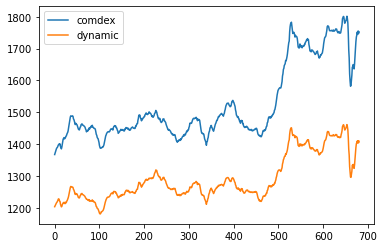

In [ ]:
Indexs = {'comdex': G['index'], 'dynamic' : f['Index']}
Indexs =pd.DataFrame(Indexs)
Indexs
plt.figure()
Indexs.plot()
plt.show()